# Kristen Brandt, Oliver Graf, Estuardo Ureta

## Análisis exploratorio

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from pandas_profiling import ProfileReport
import pandas_profiling as pp

In [2]:
import os
os.getcwd()

'/Users/kristenbrandt/Documents/Universidad/Data Science/Proyecto2/RSNA_Bone_Age'

Lo primero es cargar el training y test dataset para poderlas utilizar despues

In [3]:
train_df = pd.read_csv('/Users/kristenbrandt/Documents/Universidad/Data Science/Proyecto2/10832_15122_bundle_archive/boneage-training-dataset.csv')

test_df = pd.read_csv('/Users/kristenbrandt/Documents/Universidad/Data Science/Proyecto2/10832_15122_bundle_archive/boneage-test-dataset.csv')

Pandas profiling de el train dataset para poder entenderlo mejor

In [4]:
profile = ProfileReport(train_df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_widgets()

/usr/local/lib/python3.8/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


male y female

<AxesSubplot:xlabel='male', ylabel='count'>

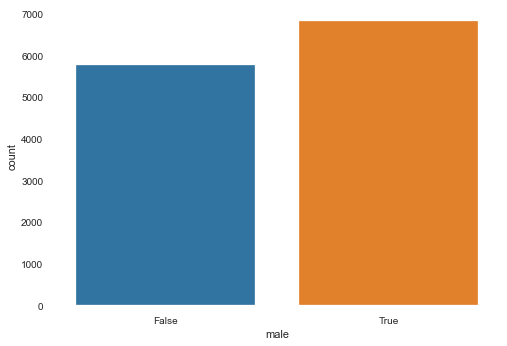

In [5]:
sb.countplot(x = train_df['male'])

In [6]:
train_df.loc[train_df['male'] ==True , 'gender'] = "male"

In [7]:
train_df.loc[train_df['male'] ==False , 'gender'] = "female"

In [8]:
male = train_df[train_df['gender'] == 'male']
female = train_df[train_df['gender'] == 'female']

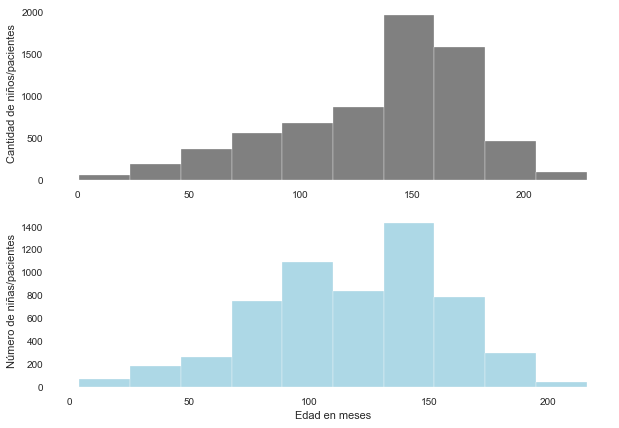

In [9]:
fig, ax = plt.subplots(2,1)
ax[0].hist(male['boneage'], color = 'grey')
ax[0].set_ylabel('Cantidad de niños/pacientes')
ax[1].hist(female['boneage'], color = 'lightblue')
ax[1].set_xlabel('Edad en meses')
ax[1].set_ylabel('Número de niñas/pacientes')
fig.set_size_inches((10,7))

In [10]:
profile = ProfileReport(male, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_widgets()

/usr/local/lib/python3.8/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


In [11]:
profile = ProfileReport(female, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_widgets()

/usr/local/lib/python3.8/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


### Imagenes

In [12]:
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

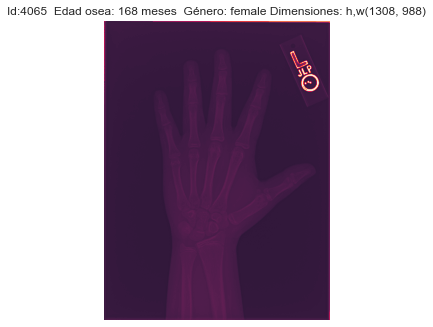

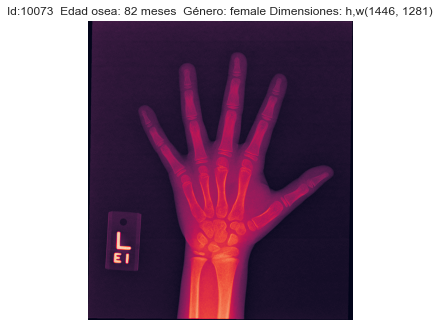

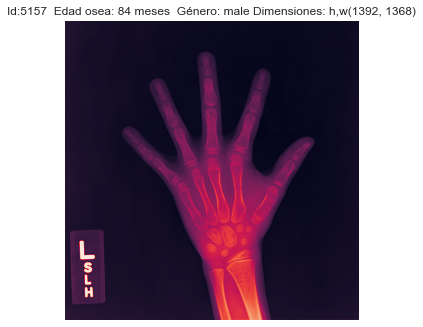

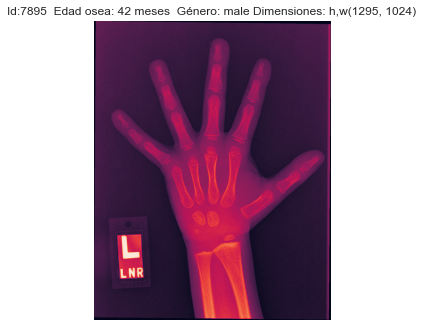

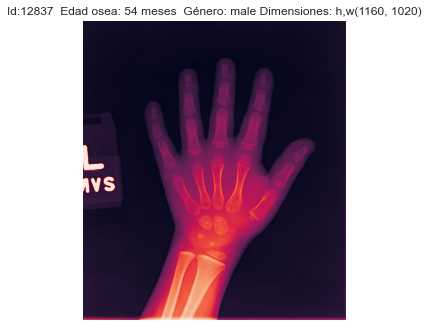

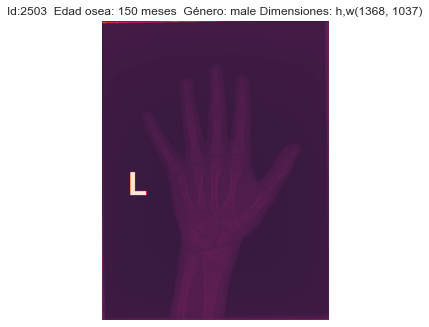

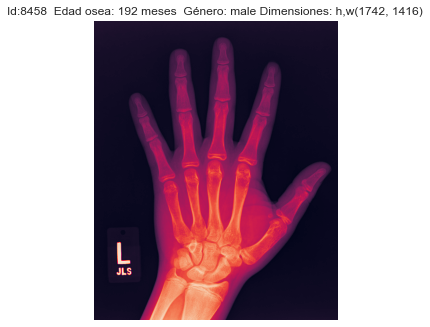

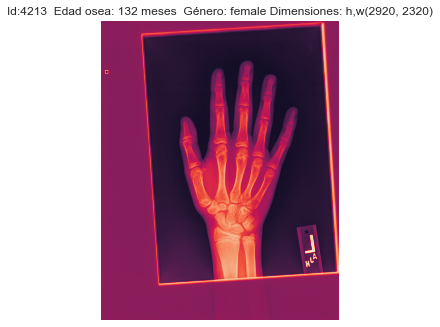

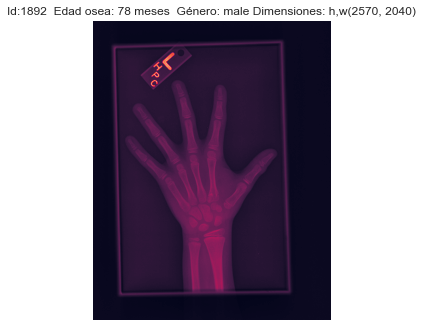

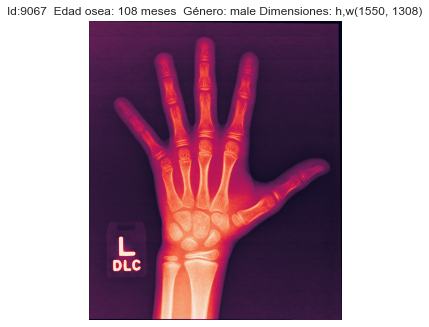

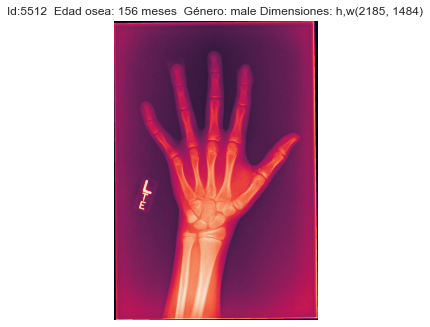

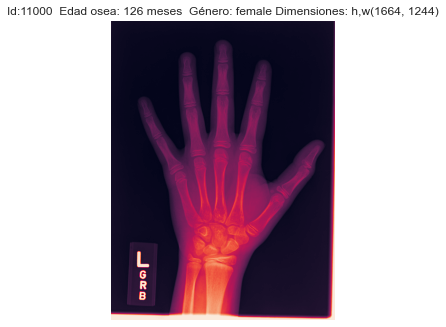

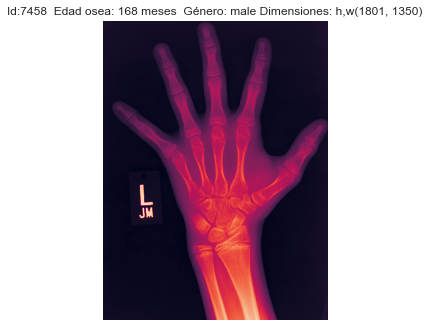

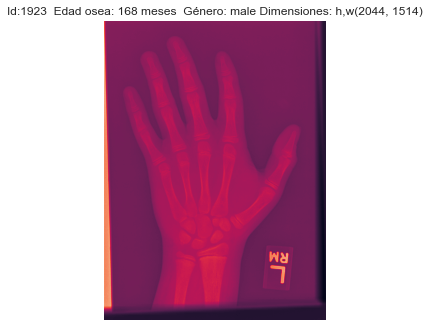

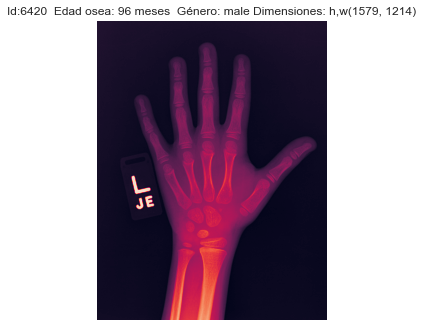

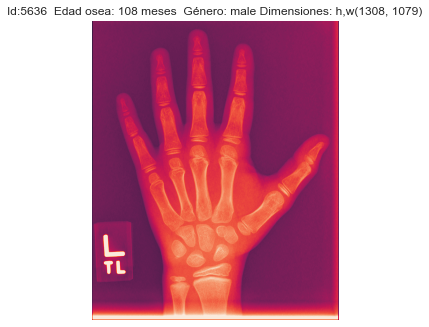

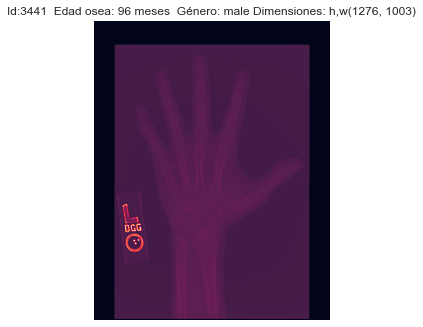

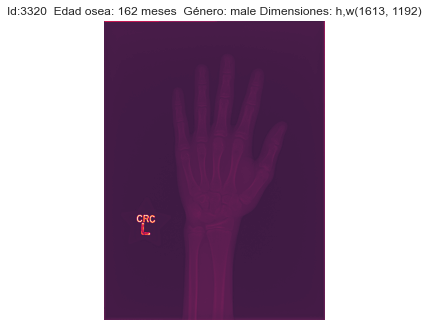

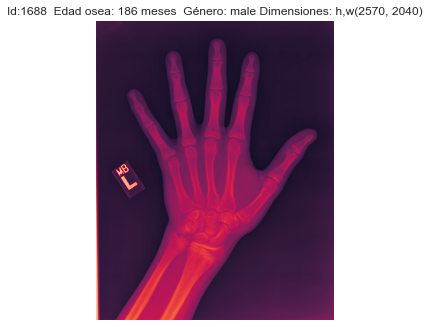

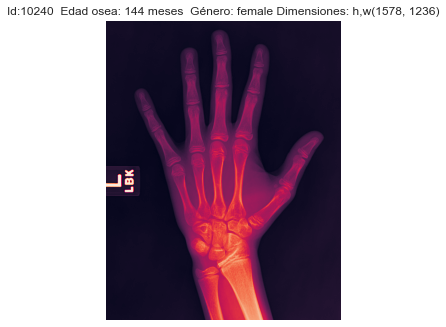

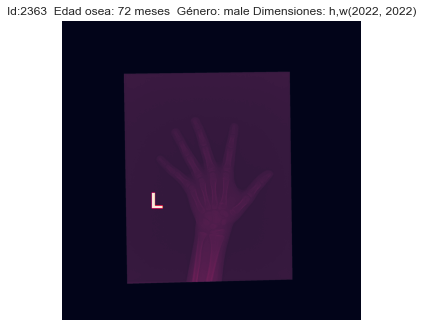

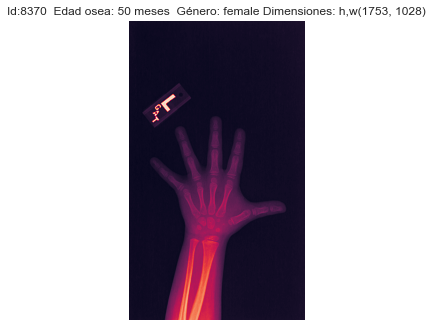

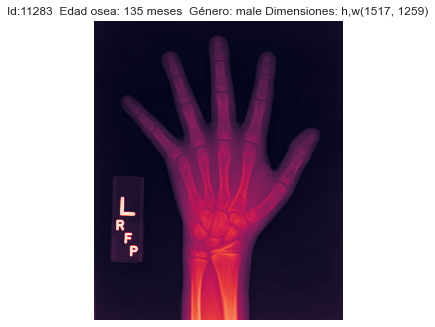

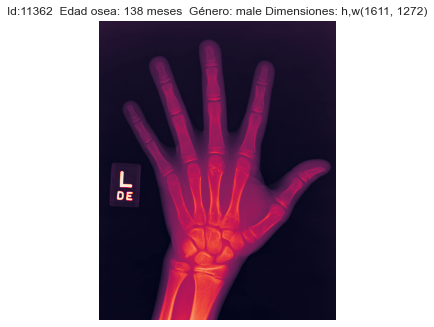

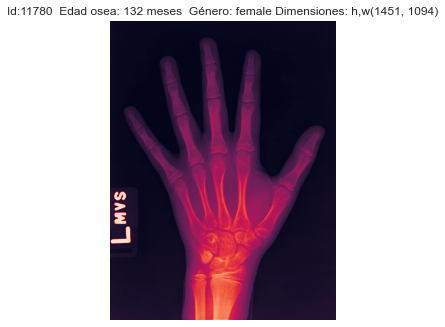

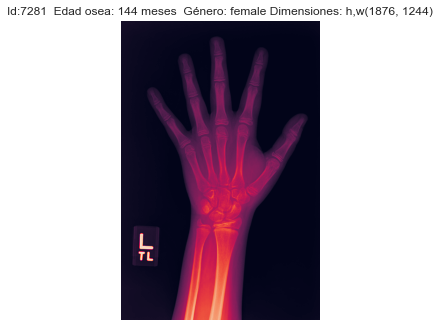

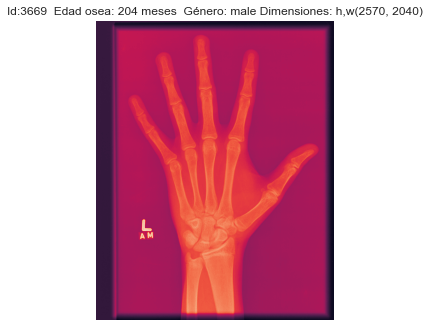

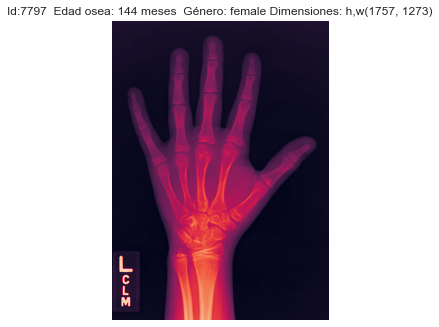

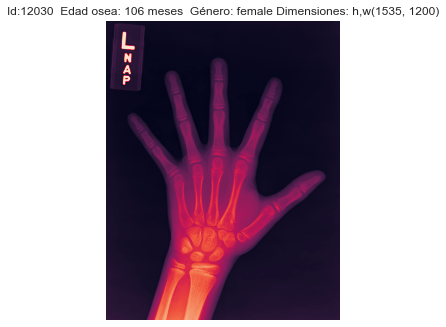

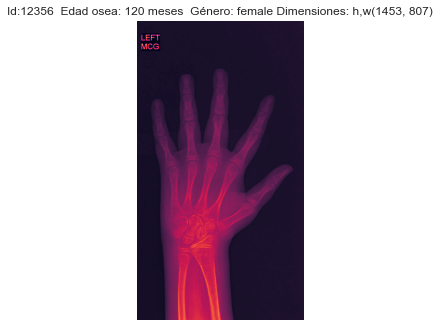

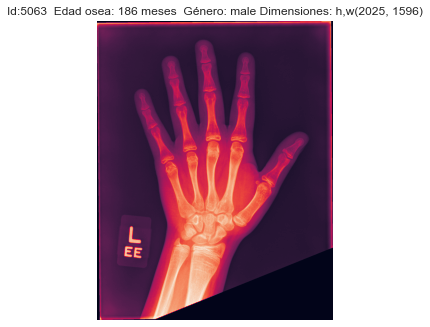

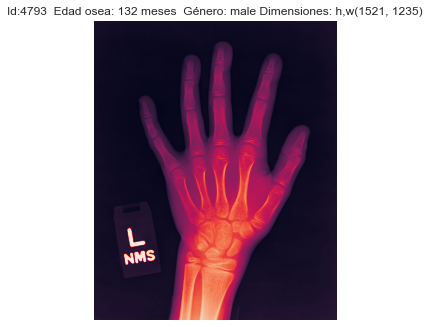

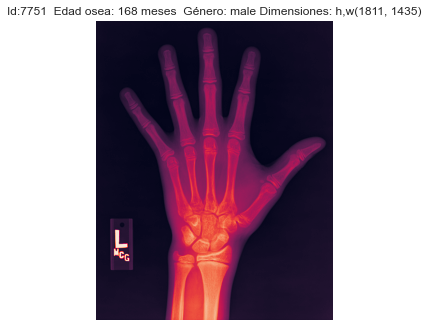

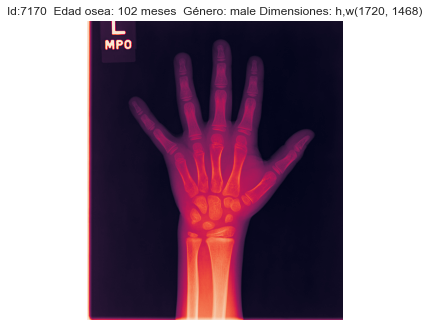

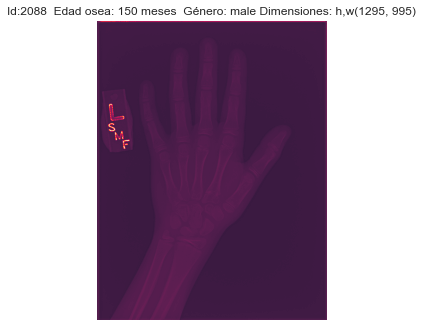

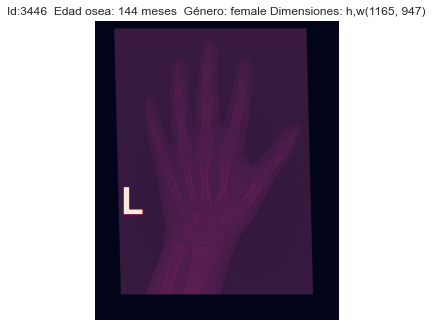

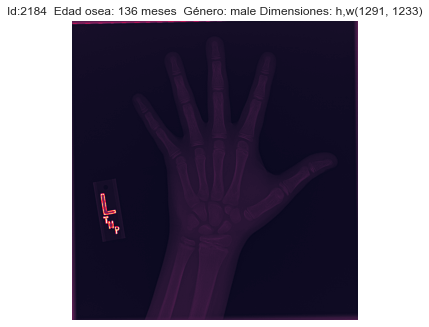

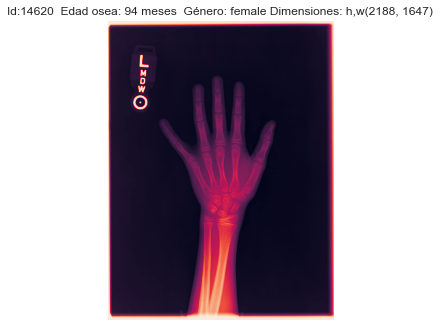

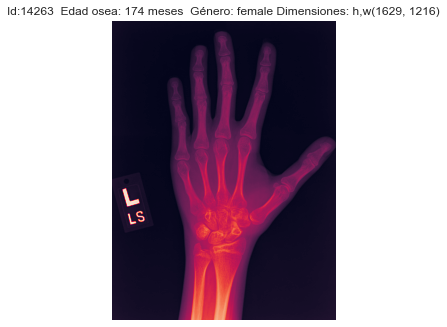

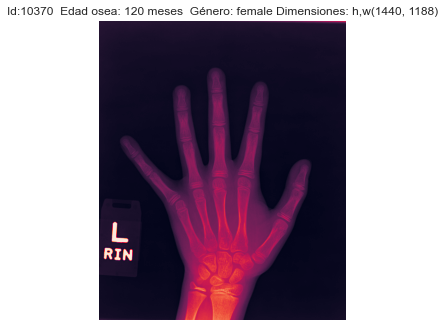

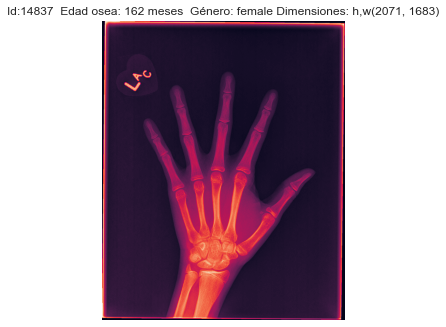

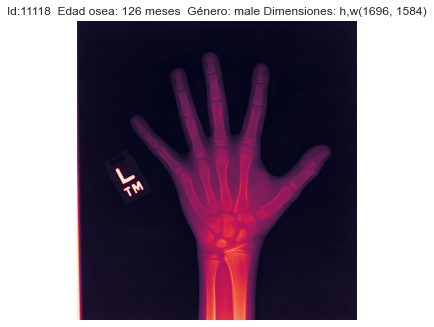

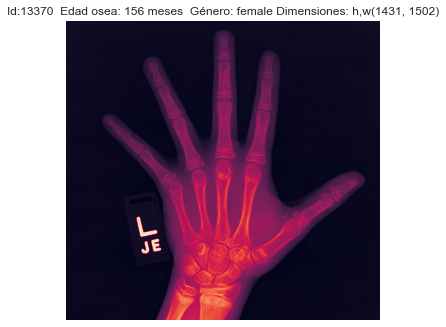

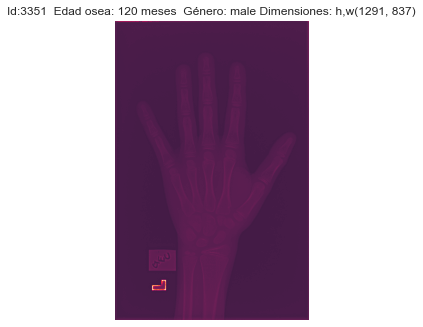

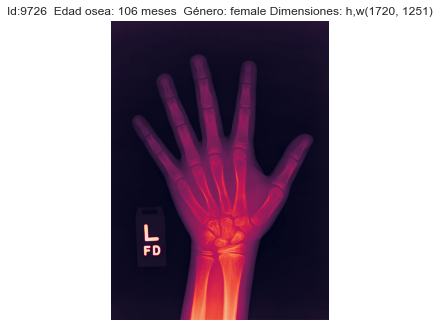

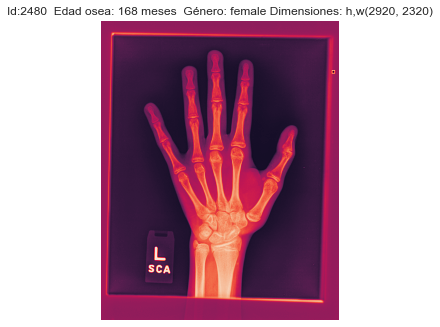

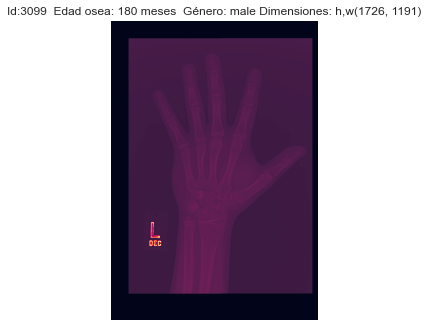

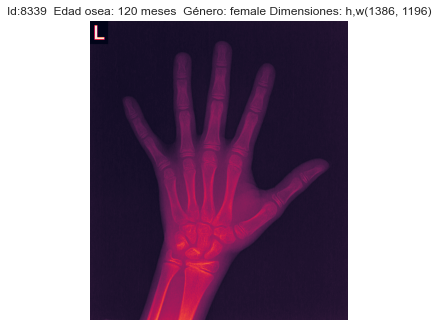

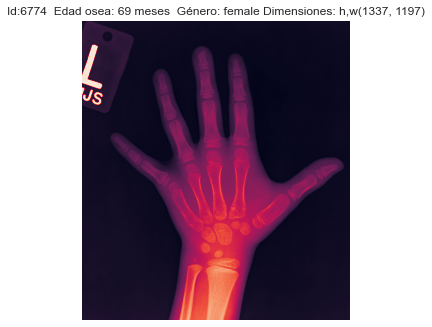

In [13]:
for ids, boneage, gender in train_df[['id','boneage','gender']].sample(50).values:
    #le pasamos el path
    img = mpimg.imread(f'/Users/kristenbrandt/Documents/Universidad/Data Science/Proyecto2/10832_15122_bundle_archive/boneage-training-dataset/boneage-training-dataset/{ids}.png')
    plt.imshow(img)#plotteamos la imagen
    plt.title('Id:{}  Edad osea: {} meses  Género: {} Dimensiones: h,w{}'.format(ids, boneage, gender, img.shape))
    plt.axis('off')
    plt.show()

In [14]:
train_df['path'] = f'/Users/kristenbrandt/Documents/Universidad/Data Science/Proyecto2/10832_15122_bundle_archive/boneage-training-dataset/boneage-training-dataset/{ids}.png'

podemos notar que las imagenes tienen distintas dimensiones, eso es algo que hay que arreglar

## Preprocessing de las imagenes usando TensorFlow

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from  keras.applications.xception import preprocess_input 

In [16]:
#mean age is
mean_bone_age = train_df['boneage'].mean()
#standard deviation of boneage
std_bone_age = train_df['boneage'].std()

In [17]:
train_df['id'] = train_df['id'].apply(lambda x: str(x)+'.png')
test_df['Case ID'] = test_df['Case ID'].apply(lambda x: str(x)+'.png') 

In [18]:
train_df['bone_age_z'] = (train_df['boneage'] - mean_bone_age)/(std_bone_age)

In [25]:
#splitting train dataframe into traininng and validation dataframes
df_train, df_valid = train_test_split(train_df, test_size = 0.2, random_state = 0)

In [26]:
img_size = 256

train_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)
val_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

In [33]:
#train data generator
train_generator = train_data_generator.flow_from_dataframe(
    dataframe = train_df,
    directory = '/Users/kristenbrandt/Documents/Universidad/Data Science/Proyecto2/10832_15122_bundle_archive/boneage-training-dataset/boneage-training-dataset',
    x_col= 'id',
    y_col= 'bone_age_z',
    batch_size = 12611,
    seed = 42,
    shuffle = True,
    class_mode= 'other',
    flip_vertical = True,
    color_mode = "grayscale",
    interpolation = 'nearest',
    target_size = (img_size, img_size))

#validation data generator
val_generator = val_data_generator.flow_from_dataframe(
    dataframe = df_valid,
    directory = '/Users/kristenbrandt/Documents/Universidad/Data Science/Proyecto2/10832_15122_bundle_archive/boneage-training-dataset/boneage-training-dataset',
    x_col = 'id',
    y_col = 'bone_age_z',
    batch_size = 2523,
    seed = 42,
    shuffle = True,
    class_mode = 'other',
    flip_vertical = True,
    color_mode = "grayscale",
    interpolation = 'nearest',
    target_size = (img_size, img_size))
    

#test data generator
test_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

test_generator = test_data_generator.flow_from_directory(
    directory = '/Users/kristenbrandt/Documents/Universidad/Data Science/Proyecto2/10832_15122_bundle_archive/boneage-test-dataset/boneage-test-dataset',
    shuffle = True,
    class_mode = None,
    color_mode = "grayscale",
    interpolation = "nearest",
    target_size = (img_size,img_size))
    



Found 12611 validated image filenames.
Found 2523 validated image filenames.
Found 0 images belonging to 0 classes.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_glo


# Hacer lo mismo para test

In [34]:
test_X, test_Y = next(val_data_generator.flow_from_dataframe( 
                            df_valid, 
                            directory = '/Users/kristenbrandt/Documents/Universidad/Data Science/Proyecto2/10832_15122_bundle_archive/boneage-training-dataset/boneage-training-dataset',
                            x_col = 'id',
                            y_col = 'bone_age_z', 
                            target_size = (img_size, img_size),
                            interpolation = "nearest",
                            batch_size = 2523,
                            class_mode = 'other'
    
                            )) 

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_glo

Found 2523 validated image filenames.


In [1]:
#INTENTO 1 PARA VER IMAGENES @test_generator ¿?
for ids, boneage, gender in test_generator[['id','boneage','gender']].sample(50).values:
    #le pasamos el path
    img = mpimg.imread(f'/Users/kristenbrandt/Documents/Universidad/Data Science/Proyecto2/10832_15122_bundle_archive/boneage-training-dataset/boneage-training-dataset/{ids}.png')
    plt.imshow(img)#plotteamos la imagen
    plt.title('Id:{}  Edad osea: {} meses  Género: {} Dimensiones: h,w{}'.format(ids, boneage, gender, img.shape))
    plt.axis('off')
    plt.show()

NameError: name 'test_generator' is not defined